<a href="https://colab.research.google.com/github/mrchapagain/SocialNetworkAnalytics/blob/main/TwiteerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweeter Data Analytics

***Here I will cover:***
1.   *Basics of Analyzing Twitter Data*
2.   *Processing Twitter text*
1.   *Exploring Twitter Networks*
2.   *Putting Twitter data on the map*

***Twiteer APIs:***
*   *Search API*
*   *Ads API*
*   *Streaming API*

#1. Basics of Analyzing Twitter Data

***Class object for handling data***

***Libaries***

In [198]:
# Necessary libaries
from tweepy import OAuthHandler
from tweepy import API
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

***Necessary information form tweet account***
*   access_token
*   access_token_secret
*   consumer_key
*   consumer_secret

***Tweepy authentication***

In [73]:
consumer_key='hYt37U1prLMj2LBfWaH3VfwAP'
consumer_secret='8sOKCBqlh0NLEByi3IjQ1mjlhTVhAtFzoOLqU9w5vn0qjmdAR1'
access_token='14970816-bxUWKHaeQvNpVP7nNzgOwWe2Sa3dsLAposBrhuhsg'
access_token_secret='nqioC9WEH7XFXpMU6KxmKuplZ4SIwmcgKAUzQYc1E2bXo'
#brear_token= 'AAAAAAAAAAAAAAAAAAAAAOlDeQEAAAAAtxFqk6MPlQlb%2BXr9%2F%2FfigPqSrRM%3D5zoaTJT2GA3XhDBDAfgrnCnr1WxeCFVMVT5k3oUz97D4JJfZOD'

auth = OAuthHandler(consumer_key, consumer_secret) # Consumer key authentication
auth.set_access_token(access_token, access_token_secret) # Access key authentication
api = API(auth)  # Set up the API with the authentication handler
api

***Creating variable to navigate twetter***

In [279]:
# Obtaining tweet from specific user account
number_of_tweets = 200
tweets = []
likes = []
time = []

for i in tweepy.Cursor(api.user_timeline, id="elonmusk", tweet_mode="extended").items(number_of_tweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)
  print(i.items())

AttributeError: ignored

***Loading them in Data Frame***

In [255]:
# save them as dataframe by passing variables as a columns
df = pd.DataFrame({"tweets":tweets, "likes":likes, "time":time})
df= df[~df.tweets.str.contains("RT")].reset_index(drop=True)
#now lets make only tweets thats has not Re-Tweeted!

df.head()

,tweets,likes,time
0,@thesheetztweetz Their attempt to bait and swi...,12048,2022-06-21 22:33:11
1,@SawyerMerritt Hardly anyone knows this,68791,2022-06-21 19:14:51
2,@alex_avoigt @WholeMarsBlog Probably only a fe...,4420,2022-06-21 17:04:33
3,@business Twitter me &amp; real-life me are qu...,144931,2022-06-21 17:02:15
4,@BloombergLive @Twitter The vote of confidence...,41694,2022-06-21 16:58:57


In [256]:
# Top most liked tweets
mostlike= df.loc[df.likes.nlargest(10).index].set_index("tweets")
mostlike

,likes,time
tweets,,
https://t.co/YhpHKcCYXz,758229,2022-06-21 15:53:59
https://t.co/oD5D5CVe5A,574063,2022-06-17 21:15:31
https://t.co/adMlWpAfz1,520181,2022-06-14 19:27:43
Humor is one of the great joys of life!,476879,2022-06-11 22:24:31
Happy Father’s Day,445702,2022-06-19 05:45:31
Is TikTok destroying civilization? Some people think so.,440241,2022-06-18 00:57:04
I will keep supporting Dogecoin,392937,2022-06-19 06:19:16
Words are beautiful,287189,2022-06-12 20:47:10
Cryptonight,278938,2022-06-15 00:54:50


***Sentiment Analytics***

In [258]:
# Libaries for sentiment analytics (NLP)
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [259]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

In [260]:
# Split all the sentances and creat the list of sentence of from the tweet columns
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)
print(lines)

['@thesheetztweetz', 'Their', 'attempt', 'to', 'bait', 'and', 'switch', 'satellite', 'spectrum', 'for', 'cellular', 'spectrum', 'is', 'super', 'shady', 'and', 'unethical.', 'If', 'they', 'are', 'successful,', 'it', 'would', 'hurt', 'the', 'least', 'served', 'and', 'completely', 'unserved', 'of', 'the', 'world.', 'Very', 'messed', 'up.', '@SawyerMerritt', 'Hardly', 'anyone', 'knows', 'this', '@alex_avoigt', '@WholeMarsBlog', 'Probably', 'only', 'a', 'few', 'months', '@business', 'Twitter', 'me', '&amp;', 'real-life', 'me', 'are', 'quite', 'different', 'haha!', 'https://t.co/zedimZrthW', '@BloombergLive', '@Twitter', 'The', 'vote', 'of', 'confidence', 'is', 'much', 'appreciated', 'https://t.co/YhpHKcCYXz', '@Degentraland', 'Artificial', 'Insemination?', 'AI', 'gets', 'better', 'every', 'day', 'https://t.co/Lz5XfXRJjh', 'Some', 'great', 'suggestions', 'in', 'the', 'comments!', 'But', 'sometimes', 'they’re', 'out', 'of', 'stock', 'https://t.co/ybRiBp1kkP', '@marenkahnert', 'That', 'was', '

In [261]:
# Removing Punctuation by using Regular Expression (RegEx)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2= []

for word in lines:
  if word != '':
    lines2.append(word)

In [262]:
# Stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem= []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [263]:
# Removing all the stop words
stem2= []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)

In [264]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
df2.head()

billym2k         24
teslaownerssv    20
amp              11
im               10
spacex           10
Name: 0, dtype: int64

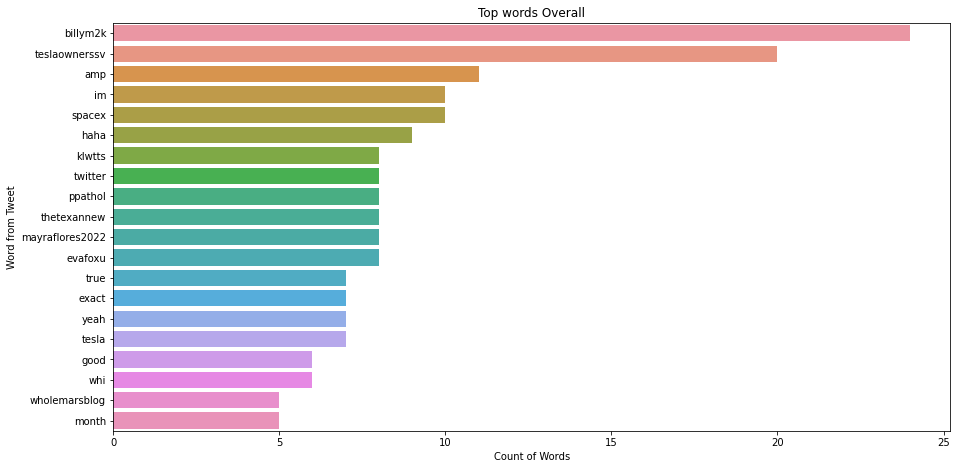

In [265]:
# Visualization
df2= df2[:20,]
plt.figure(figsize=(15,7.5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()

In [266]:
# Visualization for mentions organizations
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [267]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

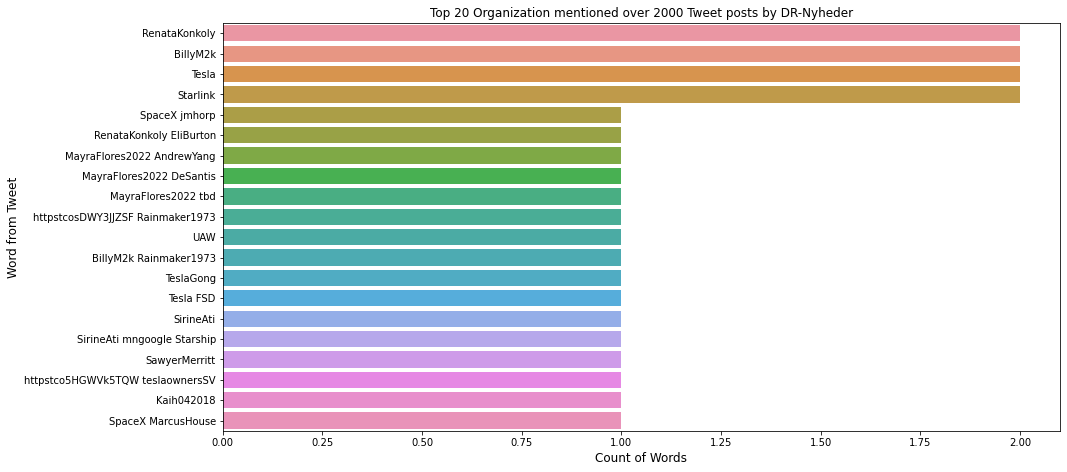

In [268]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top 20 Organization mentioned over 2000 Tweet posts by DR-Nyheder')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()